**Завдання**
#### Використовуючи модель *ARIMA* і датасет *Yearly sunspots data 1700-2008*:
* **побудувати прогноз на 2009–2030 рр.**

In [88]:
import pandas as pd
import warnings
import statsmodels.api as sm


# Load a main dataset.
data_sun = sm.datasets.sunspots.load_pandas().data
data_sun


,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [89]:
print(data_sun.dtypes)


YEAR           float64
SUNACTIVITY    float64
dtype: object


In [90]:
print(data_sun.isnull().sum())


YEAR           0
SUNACTIVITY    0
dtype: int64


In [91]:
# Setting first name as an index column.
idx = data_sun['YEAR']
data_sun['YEAR'] = pd.to_numeric(data_sun['YEAR'])
data_sun.set_index('YEAR', inplace=True)

print(data_sun.dtypes)
print(type(data_sun))
data_sun


SUNACTIVITY    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>


,SUNACTIVITY
YEAR,
1700.0,5.0
1701.0,11.0
1702.0,16.0
1703.0,23.0
1704.0,36.0
...,...
2004.0,40.4
2005.0,29.8
2006.0,15.2


#### Visualisation a raw dataset:

Text(0.5, 1.0, 'Yearly sunspots data for 308 years (1700-2008)')

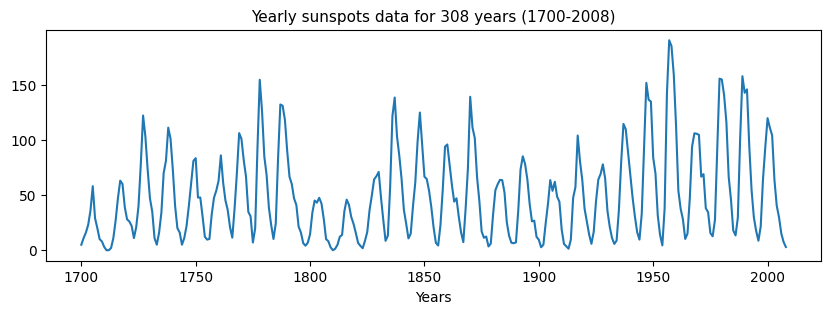

In [92]:
import matplotlib.pyplot as plt


plt.plot(data_sun)
plt.rcParams['figure.figsize'] = [10, 8]
plt.xlabel('Years')
plt.title('Yearly sunspots data for 308 years (1700-2008)', size=11)


In [93]:
from statsmodels.tsa.stattools import acf, pacf


# Autocorrelation.
acf_value = acf(data_sun.SUNACTIVITY)
print('Autocorrelation:')
print(acf_value)

# Partial Autocorrelation.
pacf_value = pacf(data_sun.SUNACTIVITY, nlags=3)
print('\nPartial autocorrelation:')
print(pacf_value)


Autocorrelation:
[ 1.          0.82020129  0.45126849  0.03957655 -0.27579196 -0.42523943
 -0.37659509 -0.15737391  0.15820254  0.47309753  0.65898002  0.65029082
  0.45666254  0.16179329 -0.12205105 -0.3161808  -0.37471125 -0.30605753
 -0.1348069   0.09158727  0.2975632   0.4207074   0.41183954  0.27020758
  0.04496208]

Partial autocorrelation:
[ 1.          0.82286429 -0.69031022 -0.14057213]


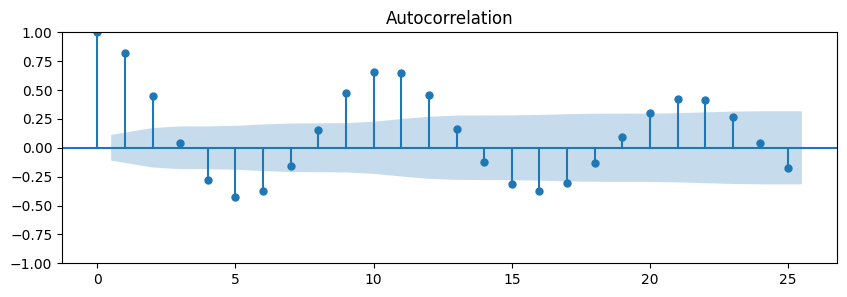

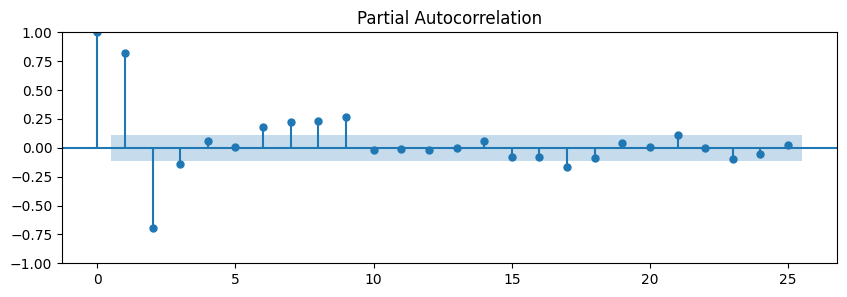

In [94]:
from matplotlib import pyplot
import matplotlib
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ignore Warning messages.
warnings.simplefilter("ignore")

# Visualisation Autocorrelation and Partial Autocorrelation
matplotlib.rcParams['figure.figsize'] = [10, 3]
plot_acf(data_sun.SUNACTIVITY)
plot_pacf(data_sun.SUNACTIVITY)
pyplot.show()


### **ARIMA model**:

In [95]:
from statsmodels.tsa.arima.model import ARIMA

# Make an ARIMA model.
arima_model = ARIMA(data_sun, order=(1, 1, 2))
arima_model_fit = arima_model.fit()
print('\nResult by ARIMA model:')
print(arima_model_fit.summary().tables[1])



Result by ARIMA model:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7396      0.048     15.464      0.000       0.646       0.833
ma.L1         -0.4770      0.049     -9.668      0.000      -0.574      -0.380
ma.L2         -0.5166      0.049    -10.539      0.000      -0.613      -0.421
sigma2       371.5706     23.125     16.068      0.000     326.246     416.895


In [96]:
# Parameters of model.
print(arima_model_fit.params)


ar.L1       0.739600
ma.L1      -0.476997
ma.L2      -0.516581
sigma2    371.570642
dtype: float64


In [97]:
# Computation accuracy Mertrics.
print(arima_model_fit.fittedvalues)


YEAR
1700.0     0.000000
1701.0     5.000646
1702.0    12.605954
1703.0    15.975202
1704.0    23.957015
            ...    
2004.0    43.725578
2005.0    41.696995
2006.0    29.344189
2007.0    17.281293
2008.0    13.766442
Length: 309, dtype: float64


In [98]:
# Prediction SUNACTIVITY for the next 21 years (2009–2030).
pred_model = arima_model_fit.predict(start=2009, end=2030)
print('\nPrediction by ARIMA model:')
print(pred_model)



Prediction by ARIMA model:
2009    50.648578
2010    50.648578
2011    50.648578
2012    50.648578
2013    50.648578
2014    50.648578
2015    50.648578
2016    50.648578
2017    50.648578
2018    50.648578
2019    50.648578
2020    50.648578
2021    50.648578
2022    50.648578
2023    50.648578
2024    50.648578
2025    50.648578
2026    50.648578
2027    50.648578
2028    50.648578
2029    50.648578
2030    50.648578
Name: predicted_mean, dtype: float64


In [99]:
print(arima_model_fit.forecast(21))


309     9.723878
310    20.380671
311    28.262435
312    34.091787
313    38.403176
314    41.591879
315    43.950244
316    45.694490
317    46.984535
318    47.938652
319    48.644316
320    49.166226
321    49.552231
322    49.837719
323    50.048867
324    50.205032
325    50.320531
326    50.405954
327    50.469134
328    50.515861
329    50.550420
Name: predicted_mean, dtype: float64


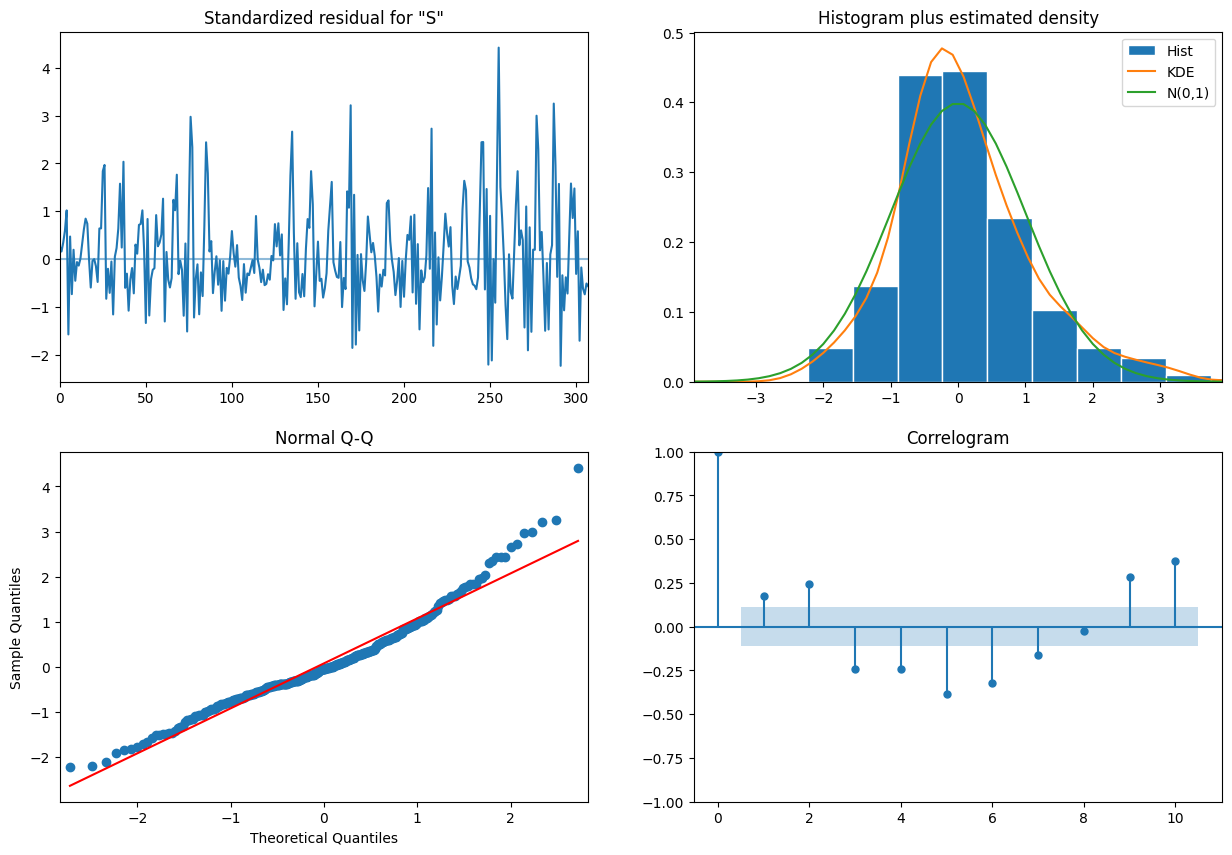

In [100]:
# Visualisation ARIMA model.
arima_model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()


In [101]:
# Prediction SUNACTIVITY for the next 21 years (2009–2030).
pred_year = arima_model_fit.get_forecast(steps=21)

# Interval of prediction.
pred_interval = pred_year.conf_int()
print(pred_interval)


     lower SUNACTIVITY  upper SUNACTIVITY
309         -28.068542          47.516299
310         -40.507767          81.269109
311         -42.262825          98.787695
312         -41.282118         109.465692
313         -39.565686         116.372038
314         -37.812239         120.995997
315         -36.266580         124.167067
316         -34.992351         126.381331
317         -33.980207         127.949276
318         -33.194533         129.071836
319         -32.593923         129.882556
320         -32.139705         130.472158
321         -31.798935         130.903397
322         -31.544894         131.220332
323         -31.356536         131.454270
324         -31.217600         131.627663
325         -31.115675         131.756737
326         -31.041375         131.853284
327         -30.987645         131.925912
328         -30.949202         131.980923
329         -30.922107         132.022947


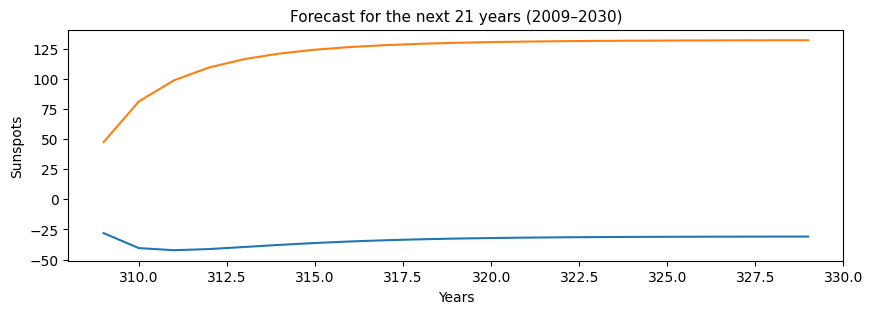

In [102]:
# Forecat visualisation.
import matplotlib.pyplot as plt

plt.plot(pred_interval)
plt.xlabel('Years')
plt.ylabel('Sunspots')
plt.title('Forecast for the next 21 years (2009–2030)', size=11)
plt.show()


### Another option of ARIMA Prediction:

In [103]:
import statsmodels.api as sa


# Make a model.
arima_model = data_sun.SUNACTIVITY[:2009] # train part dataset.
arima_model_fit = sa.tsa.ARIMA(arima_model).fit()
print(arima_model_fit.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7521      2.974     16.731      0.000      43.924      55.580
sigma2      1631.1879    154.700     10.544      0.000    1327.981    1934.394


In [104]:

# Prediction.
pred_model = arima_model_fit.predict(2009, 2030) # train and test part of dataset.
print('Prediction [2009–2030] by ARIMA model:')
print(pred_model)


Prediction [2009–2030] by ARIMA model:
2009    49.752099
2010    49.752099
2011    49.752099
2012    49.752099
2013    49.752099
2014    49.752099
2015    49.752099
2016    49.752099
2017    49.752099
2018    49.752099
2019    49.752099
2020    49.752099
2021    49.752099
2022    49.752099
2023    49.752099
2024    49.752099
2025    49.752099
2026    49.752099
2027    49.752099
2028    49.752099
2029    49.752099
2030    49.752099
Name: predicted_mean, dtype: float64


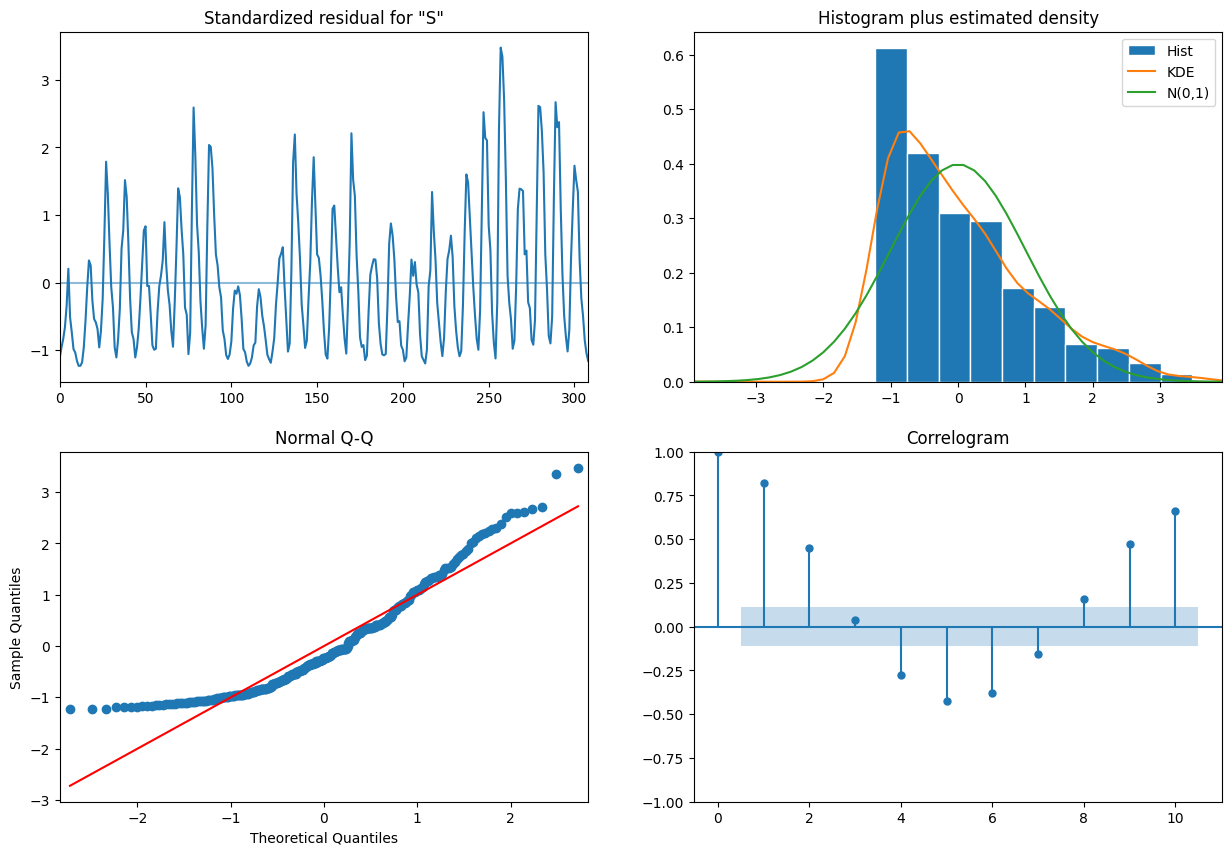

In [105]:
# Visualisation ARIMA model.fit.

arima_model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()


<AxesSubplot: xlabel='YEAR'>

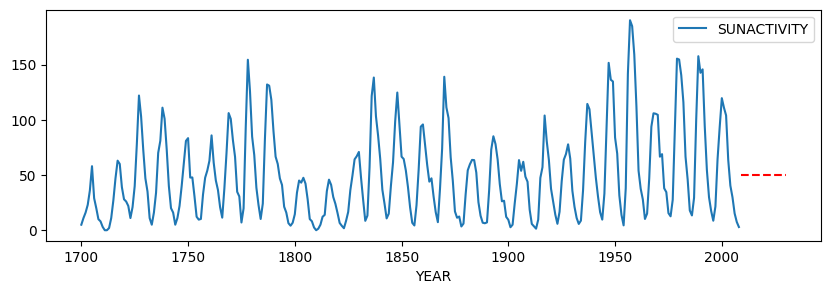

In [106]:
data_sun.plot()
pred_model.plot(style='r--')
